In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from itertools import product

In [2]:
X = pd.read_csv('Training.csv')
X.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [3]:
X.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [4]:
y = X['prognosis'].copy()
X = X.drop(['prognosis'], axis = 1)

In [5]:
X = X.drop(['Unnamed: 133'], axis = 1)

In [6]:
print('training data shape', X.shape)

training data shape (4920, 132)


In [7]:
len(X.columns)

132

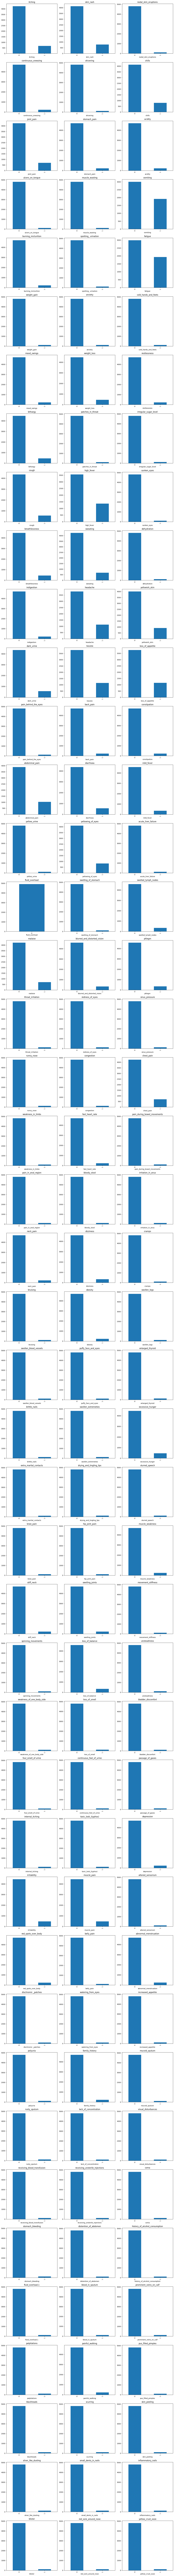

In [8]:

# Calculate the number of rows needed for the grid layout
num_rows = (len(X.columns) - 1) // 3 + 1

# Create subplots
fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

# Flatten the axs array if it's not 2D
if not isinstance(axs, np.ndarray):
    axs = np.array([axs])

# Plot each column in a separate subplot
for i, col in enumerate(X.columns):
    row_idx = i // 3
    col_idx = i % 3
    ax = axs[row_idx, col_idx]
    X[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(col)

# Remove empty subplots
if len(X.columns) % 3 != 0:
    for i in range(len(X.columns) % 3, 3):
        fig.delaxes(axs[num_rows - 1, i])

plt.tight_layout()
plt.show()

from IPython.display import display, HTML
display(HTML("<div style='overflow-x: auto; overflow-y: hidden; white-space: nowrap; width: 1500px;'>{}</div>"))

In [9]:
X.isnull().any().any()

False

In [10]:
class_number = len(y.unique())

<Axes: >

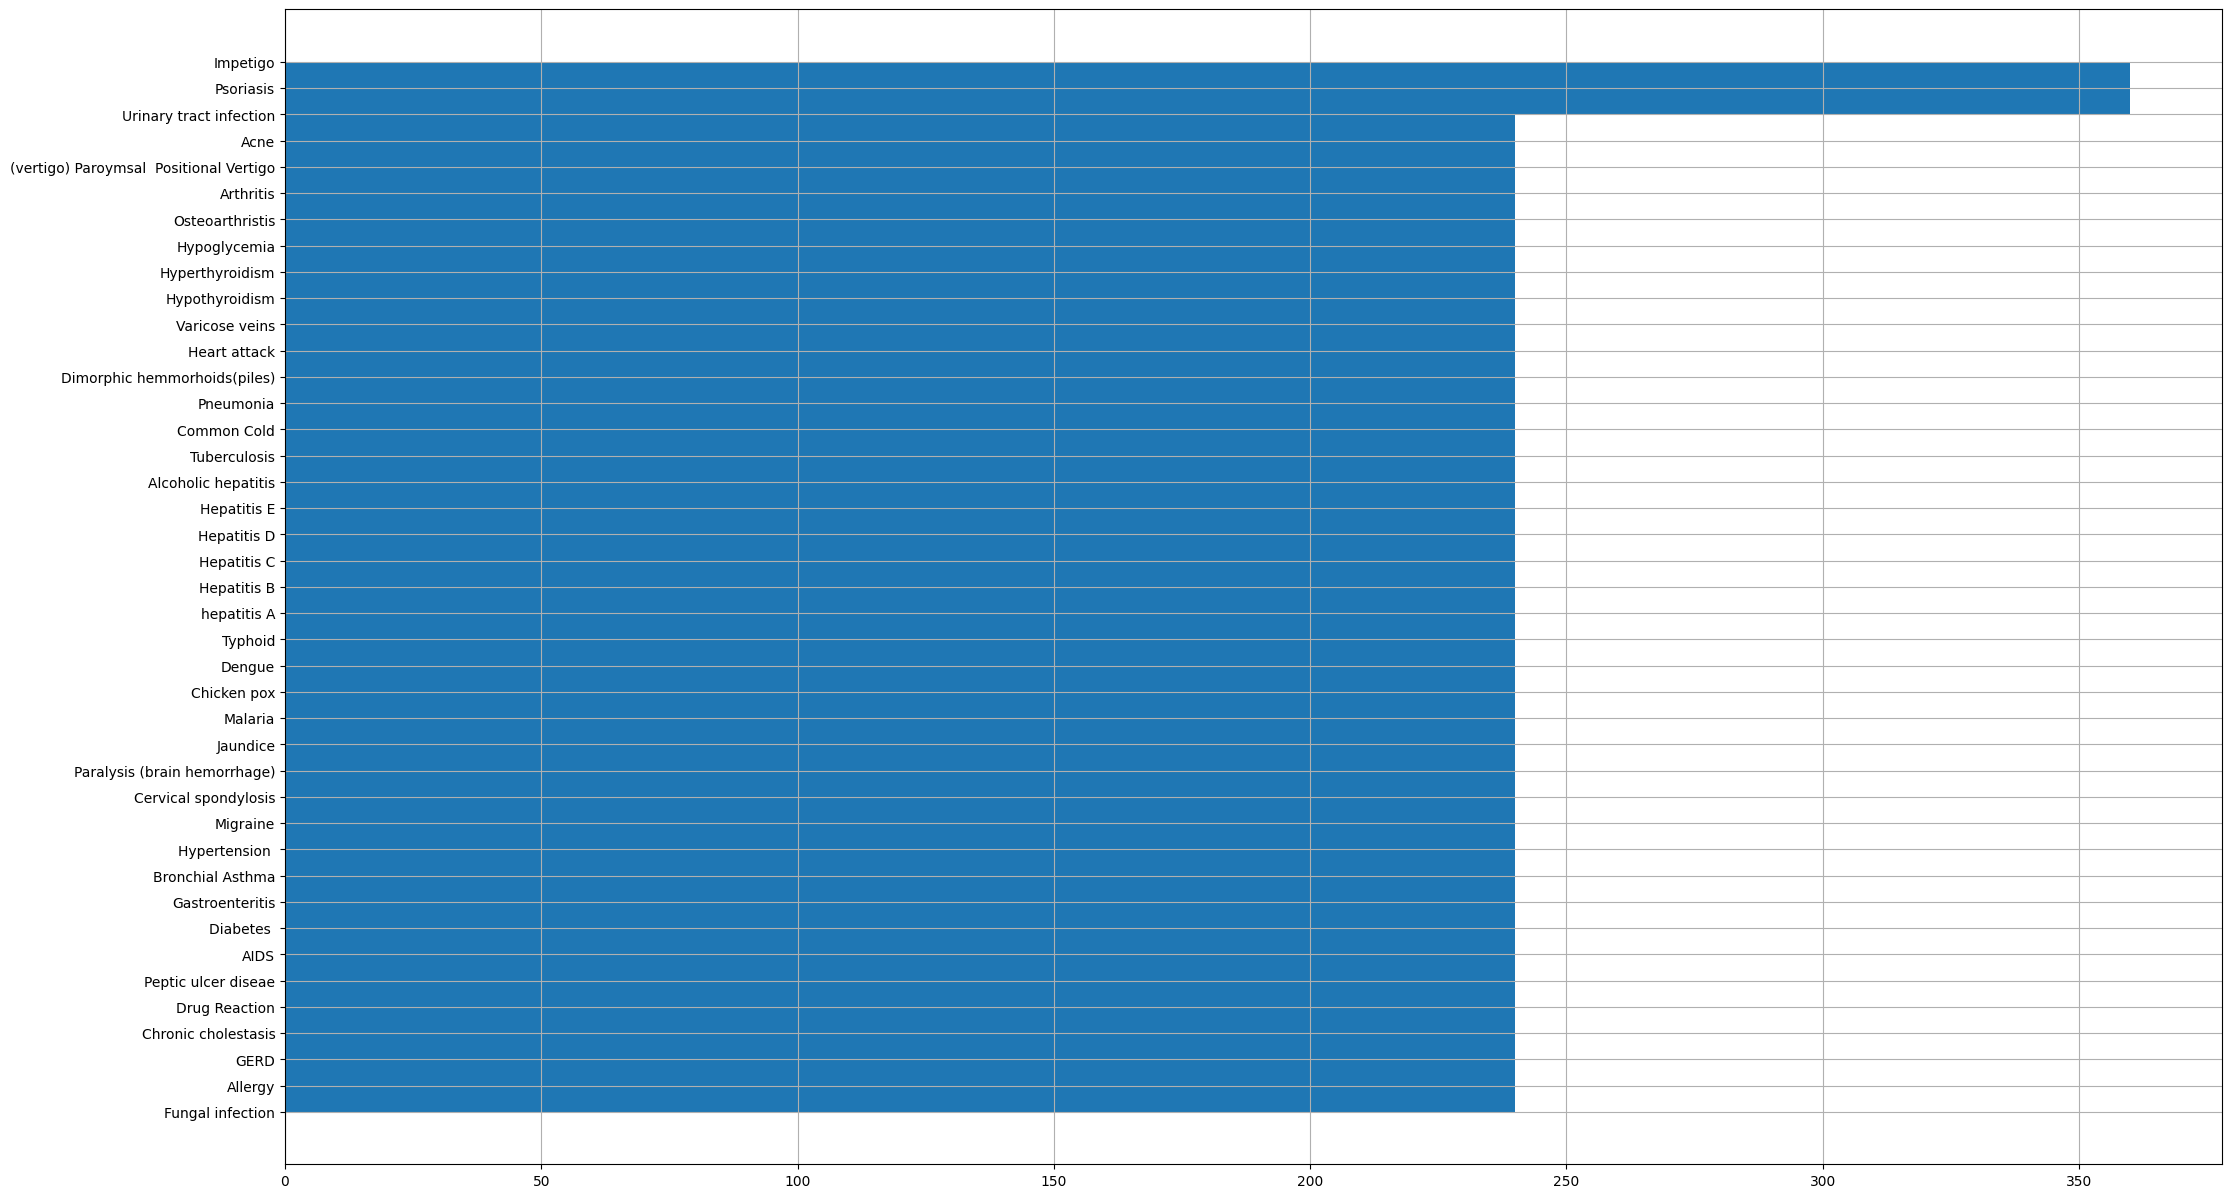

In [11]:
y.hist(orientation='horizontal', bins=20, figsize=(25,15))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [13]:
import math
number = np.ceil(math.sqrt(len(X)))
number = int(number)

In [14]:
classifier = KNeighborsClassifier(n_neighbors = number, p = class_number,metric = 'euclidean')

In [15]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=71, p=41)

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
print('the accuracy for knn is : ', accuracy_score(y_test, y_pred))

the accuracy for knn is :  1.0


In [18]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        22
                                   Acne       1.00      1.00      1.00        31
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       1.00      1.00      1.00        23
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        28
                   Cervical spondylosis       1.00      1.00      1.00        27
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        21
                            Common Cold       1.00      1.00      1.00        34
                           

In [19]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 
from itertools import product

max_depth = [3, 5, 7, 8, 9, 10, 25, 50, 100, 250, 500]

min_sample = [1,2,3,4,5,6,7,8,9,10]

combinations = list(product(max_depth, min_sample))

def get_acc(c, X_train, X_test, y_train, y_test):
    model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = c[0],min_samples_leaf = c[1])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test,y_pred)

arr2 = []
for c in combinations :
    acc = get_acc(c,X_train, X_test, y_train, y_test)
    print("the accuracy for " + str(c[0]) + " ," + str(c[1]) + " is : " + str(acc))
    arr2.append([c,acc])


best_tree_size = max(arr2, key=lambda x: x[1])[0]
print("------------------------------------------")
print("| the best tree size is : " + str(best_tree_size) + " |")
print("------------------------------------------")

the accuracy for 3 ,1 is : 0.15345528455284552
the accuracy for 3 ,2 is : 0.15345528455284552
the accuracy for 3 ,3 is : 0.15345528455284552
the accuracy for 3 ,4 is : 0.15345528455284552
the accuracy for 3 ,5 is : 0.15345528455284552
the accuracy for 3 ,6 is : 0.15345528455284552
the accuracy for 3 ,7 is : 0.15345528455284552
the accuracy for 3 ,8 is : 0.15345528455284552
the accuracy for 3 ,9 is : 0.15345528455284552
the accuracy for 3 ,10 is : 0.15345528455284552
the accuracy for 5 ,1 is : 0.6189024390243902
the accuracy for 5 ,2 is : 0.6189024390243902
the accuracy for 5 ,3 is : 0.6189024390243902
the accuracy for 5 ,4 is : 0.6189024390243902
the accuracy for 5 ,5 is : 0.6189024390243902
the accuracy for 5 ,6 is : 0.6189024390243902
the accuracy for 5 ,7 is : 0.6189024390243902
the accuracy for 5 ,8 is : 0.6189024390243902
the accuracy for 5 ,9 is : 0.6189024390243902
the accuracy for 5 ,10 is : 0.6189024390243902
the accuracy for 7 ,1 is : 0.8648373983739838
the accuracy for 7 ,2 